In [ ]:
pip install lifelines

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test

In [ ]:
df = pd.read_excel("/content/Base de données_SNI.xlsx")

In [ ]:
df.head()

,numtiers,Annee,NUMTIERS_ANNEE,defaut,DATE_DE_CREATION_TIERS,DATE_DE_CREATION_ENTREP,CHIFFRE_AFFAIRES,EXCEDENT_BRUT_EXPLOITATION,RESULTAT_EXPlOITATION,RESULTAT_NET,...,NIVEAU_COMPETITIVITE,QUALITE_INFORMATION_FINANCIERE,REPUTATION,STRUCTUREDUMANAGEMENT,SUPPORT,POSITIONNEMENTMARCHE,Categorie_juridique,Cote en bourse,Appartenance a un groupe,Secteurs
0,5200000007513,2015,5200000007513_2015,0,2008-01-02,1982-01-05,236073240.2,8258201.71,7120503.00,-14040379.78,...,Quelques competiteurs majeurs identifies,Etats comptables et financiers audites par un ...,Bonne,Bien structure,Support conforme aux attentes,Acteur majeur + de 20% de part de marche,SA,0,0,Transport et Communication
1,5200000007513,2016,5200000007513_2016,0,2008-01-02,1982-01-05,258386615.0,4107268.85,2031311.93,2312466.82,...,Tres forte concurrence,Etats comptables et financiers audites par un ...,Tres bonne,Bien structure,Support conforme aux attentes,Acteur majeur + de 20% de part de marche,SA,0,0,Transport et Communication
2,5200000007934,2015,5200000007934_2015,0,1988-05-31,1953-08-05,202426475.2,5028464.60,3602225.77,-413273.04,...,Absence de concurrence (quasi monopole),Etats comptables et financiers audites par un ...,Tres bonne,Bien structure,Support conforme aux attentes,Leader,SA,0,1,Industries agroalimentaires et du tabac
3,5200000007934,2017,5200000007934_2017,0,1988-05-31,1953-08-05,210917616.4,13076487.89,12514233.63,7501946.85,...,Forte presence de produits similaires et compe...,Etats comptables et financiers audites par un ...,Tres bonne,Bien structure,Support conforme aux attentes,Acteur majeur + de 20% de part de marche,SA,0,1,Industries agroalimentaires et du tabac
4,5200000008051,2015,5200000008051_2015,0,1998-10-02,1995-05-22,171987524.1,16142629.85,12544851.82,1401029.14,...,Quelques competiteurs majeurs identifies,Etats comptables et financiers audites par un ...,Tres bonne,Bien structure,Support conforme aux attentes,Acteur non significatif,SA,0,1,"Commerce, reparations automobiles et d'article..."


In [ ]:
df.dtypes.value_counts().sort_values()

datetime64[ns]     2
int64              5
object            13
float64           20
Name: count, dtype: int64

In [ ]:
pd.DataFrame(df.isna().sum().sort_values())#affiche le nombre de valeurs manquantes pour chaque colonne

,0
numtiers,0
DELAI_REGLEMENT_FOURNISSEURS,0
AUTO_FINANCEMENT,0
FRAIS_FINANCIERS,0
STOCK,0
EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT,0
DIVERSITE_CLIENTS,0
DIVERSITE_FOURNISSEURS,0
DELAI_REGLEMENT_CLIENTS,0
IMPACT_SOCIAUX_ENVIRONNEMENTAL,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   numtiers                                 1521 non-null   int64         
 1   Annee                                    1521 non-null   int64         
 2   NUMTIERS_ANNEE                           1521 non-null   object        
 3   defaut                                   1521 non-null   int64         
 4   DATE_DE_CREATION_TIERS                   1521 non-null   datetime64[ns]
 5   DATE_DE_CREATION_ENTREP                  1521 non-null   datetime64[ns]
 6   CHIFFRE_AFFAIRES                         1521 non-null   float64       
 7   EXCEDENT_BRUT_EXPLOITATION               1521 non-null   float64       
 8   RESULTAT_EXPlOITATION                    1521 non-null   float64       
 9   RESULTAT_NET                             

In [ ]:
df.describe()

,numtiers,Annee,defaut,DATE_DE_CREATION_TIERS,DATE_DE_CREATION_ENTREP,CHIFFRE_AFFAIRES,EXCEDENT_BRUT_EXPLOITATION,RESULTAT_EXPlOITATION,RESULTAT_NET,FINANCEMENT_PERMANENT,...,PASSIF_CIRCULANT,TOTAL_ACTIF,TOTAL_PASSIF,DELAI_REGLEMENT_CLIENTS,DELAI_REGLEMENT_FOURNISSEURS,AUTO_FINANCEMENT,FRAIS_FINANCIERS,STOCK,Cote en bourse,Appartenance a un groupe
count,1.521000e+03,1521.000000,1521.000000,1521,1521,1.521000e+03,1.521000e+03,1.521000e+03,1.521000e+03,1.521000e+03,...,1.521000e+03,1.521000e+03,1.521000e+03,1521.000000,1521.000000,1.521000e+03,1.521000e+03,1.521000e+03,1521.000000,1521.000000
mean,5.200003e+12,2016.723208,0.034845,1998-12-19 20:37:23.786982272,1990-10-01 12:46:51.834319488,8.836712e+08,1.113634e+11,7.084423e+07,4.466026e+07,8.179797e+08,...,4.626149e+08,1.412505e+09,1.415091e+09,311.620966,964.072998,4.932546e+07,2.849152e+07,2.138622e+08,0.038133,0.621302
min,5.200000e+12,2015.000000,0.000000,1956-04-03 00:00:00,1919-02-08 00:00:00,2.407834e+05,-7.244920e+08,-9.228820e+08,-1.365167e+09,-2.181978e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-8.732279e+08,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,5.200001e+12,2016.000000,0.000000,1992-05-06 00:00:00,1979-10-29 00:00:00,2.201000e+08,9.256980e+06,6.046446e+06,1.626665e+06,5.395758e+07,...,7.979395e+07,2.112174e+08,2.099258e+08,57.900000,81.460000,2.364414e+06,2.854053e+06,2.540362e+07,0.000000,0.000000
50%,5.200001e+12,2017.000000,0.000000,2003-03-07 00:00:00,1996-06-12 00:00:00,3.666245e+08,2.337180e+07,1.626471e+07,6.890254e+06,1.243755e+08,...,1.621355e+08,3.926067e+08,3.924325e+08,106.300000,133.960000,9.076155e+06,6.881266e+06,6.403557e+07,0.000000,1.000000
75%,5.200002e+12,2018.000000,0.000000,2010-04-20 00:00:00,2004-09-13 00:00:00,7.300641e+08,6.484448e+07,4.753765e+07,2.619013e+07,3.521020e+08,...,3.277756e+08,8.910426e+08,8.882205e+08,181.430000,206.420000,2.902258e+07,1.574645e+07,1.641099e+08,0.000000,1.000000
max,5.200009e+12,2019.000000,1.000000,2018-07-04 00:00:00,2022-04-11 00:00:00,4.654680e+10,1.692210e+14,7.383194e+09,6.191285e+09,1.324880e+11,...,2.519313e+10,1.561210e+11,1.561210e+11,180968.090000,493807.570000,7.236063e+09,4.688320e+09,1.011758e+10,1.000000,1.000000
std,2.789631e+06,1.344695,0.183449,NaN,NaN,2.260292e+09,4.338997e+12,3.374614e+08,2.689441e+08,5.511221e+09,...,1.379349e+09,6.622539e+09,6.624351e+09,4705.694905,14470.674987,2.907861e+08,1.747951e+08,7.241134e+08,0.191580,0.485222


In [ ]:
# Analyzing unique values
unique_years = df['Annee'].unique()
print("Unique observation years:", unique_years)

unique_companies = df['numtiers'].unique()
print("Number of unique companies observed:", len(unique_companies))


Unique observation years: [2015 2016 2017 2019 2018]
Number of unique companies observed: 482


In [ ]:
# Count categorical and numerical variables
num_categorical = 0
num_numerical = 0

for col in df.columns:
    if df[col].dtype == 'object':  # Assuming 'object' dtype represents categorical variables
        num_categorical += 1
    else:
        num_numerical += 1

# Print the result
print("There are", num_categorical, "categorical variables and", num_numerical, "numerical variables in this dataset.")


There are 13 categorical variables and 27 numerical variables in this dataset.


In [ ]:
# Initialize lists to store categorical and numerical variable names
categorical_variables = []
numerical_variables = []

# Count categorical and numerical variables
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_variables.append(col)
    else:
        numerical_variables.append(col)

# Print the summary
print("Summary of Variables:")
print("----------------------")
print("There are", len(categorical_variables), "categorical variables and", len(numerical_variables), "numerical variables in this dataset.\n")

print("Categorical Variables:")
for cat_var in categorical_variables:
    print("-", cat_var)

print("\nNumerical Variables:")
for num_var in numerical_variables:
    print("-", num_var)


Summary of Variables:
----------------------
There are 13 categorical variables and 27 numerical variables in this dataset.

Categorical Variables:
- NUMTIERS_ANNEE
- EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT
- DIVERSITE_CLIENTS
- DIVERSITE_FOURNISSEURS
- IMPACT_SOCIAUX_ENVIRONNEMENTAL
- NIVEAU_COMPETITIVITE
- QUALITE_INFORMATION_FINANCIERE
- REPUTATION
- STRUCTUREDUMANAGEMENT
- SUPPORT
- POSITIONNEMENTMARCHE
- Categorie_juridique
- Secteurs

Numerical Variables:
- numtiers
- Annee
- defaut
- DATE_DE_CREATION_TIERS
- DATE_DE_CREATION_ENTREP
- CHIFFRE_AFFAIRES
- EXCEDENT_BRUT_EXPLOITATION
- RESULTAT_EXPlOITATION
- RESULTAT_NET
- FINANCEMENT_PERMANENT
- FONDS_DE_ROULEMENT
- BESOIN_FONDS_ROULEMENT
- CAPITAUX_PROPRES
- TRESORIE_NETTE
- TOTAL_BILAN
- DETTE_FINANCIERE
- ACTIF_CIRCULANT
- PASSIF_CIRCULANT
- TOTAL_ACTIF
- TOTAL_PASSIF
- DELAI_REGLEMENT_CLIENTS
- DELAI_REGLEMENT_FOURNISSEURS
- AUTO_FINANCEMENT
- FRAIS_FINANCIERS
- STOCK
- Cote en bourse
- Appartenance a un groupe


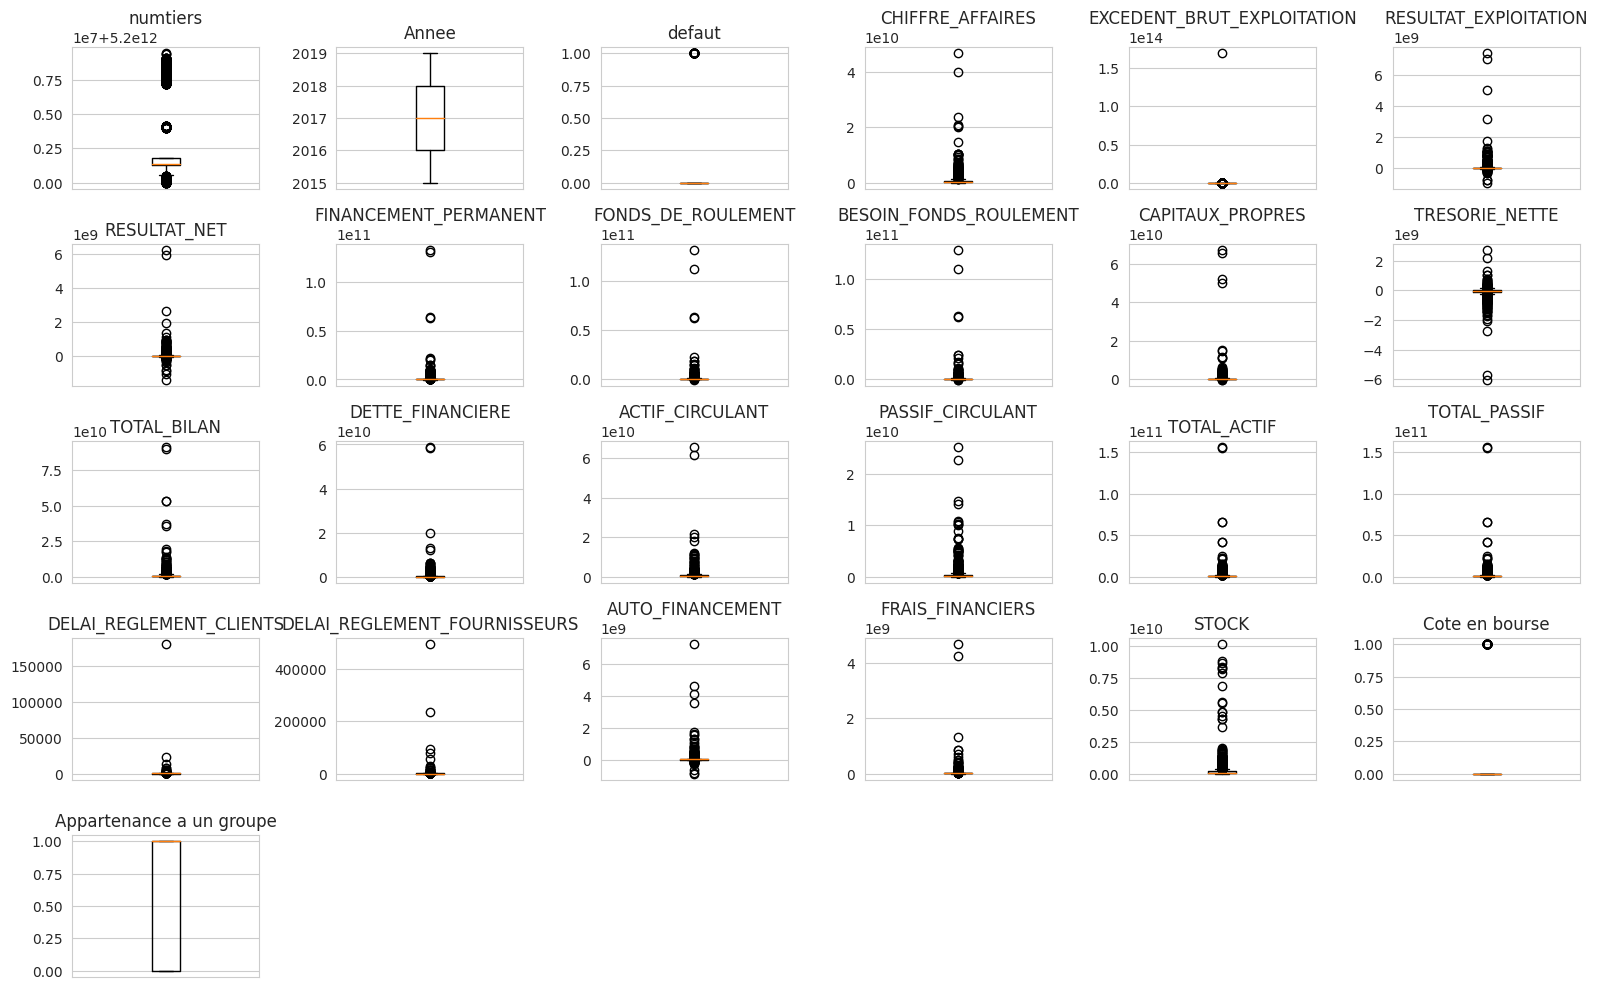

In [ ]:
import matplotlib.pyplot as plt

# Select only numerical variables for boxplot
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Plot boxplot for each numerical variable
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_df.columns):
    plt.subplot(5, 6, i+1)
    plt.boxplot(numerical_df[col])
    plt.title(col)
    plt.xticks([])  # Remove x-axis ticks to save space

plt.tight_layout()
plt.show()



In [ ]:
categorical_features=list(df.select_dtypes('O').columns)
numeric_features=list(df.select_dtypes(('int64','float64')).columns)
time_features=list(df.select_dtypes('datetime64').columns)

<Figure size 640x480 with 0 Axes>

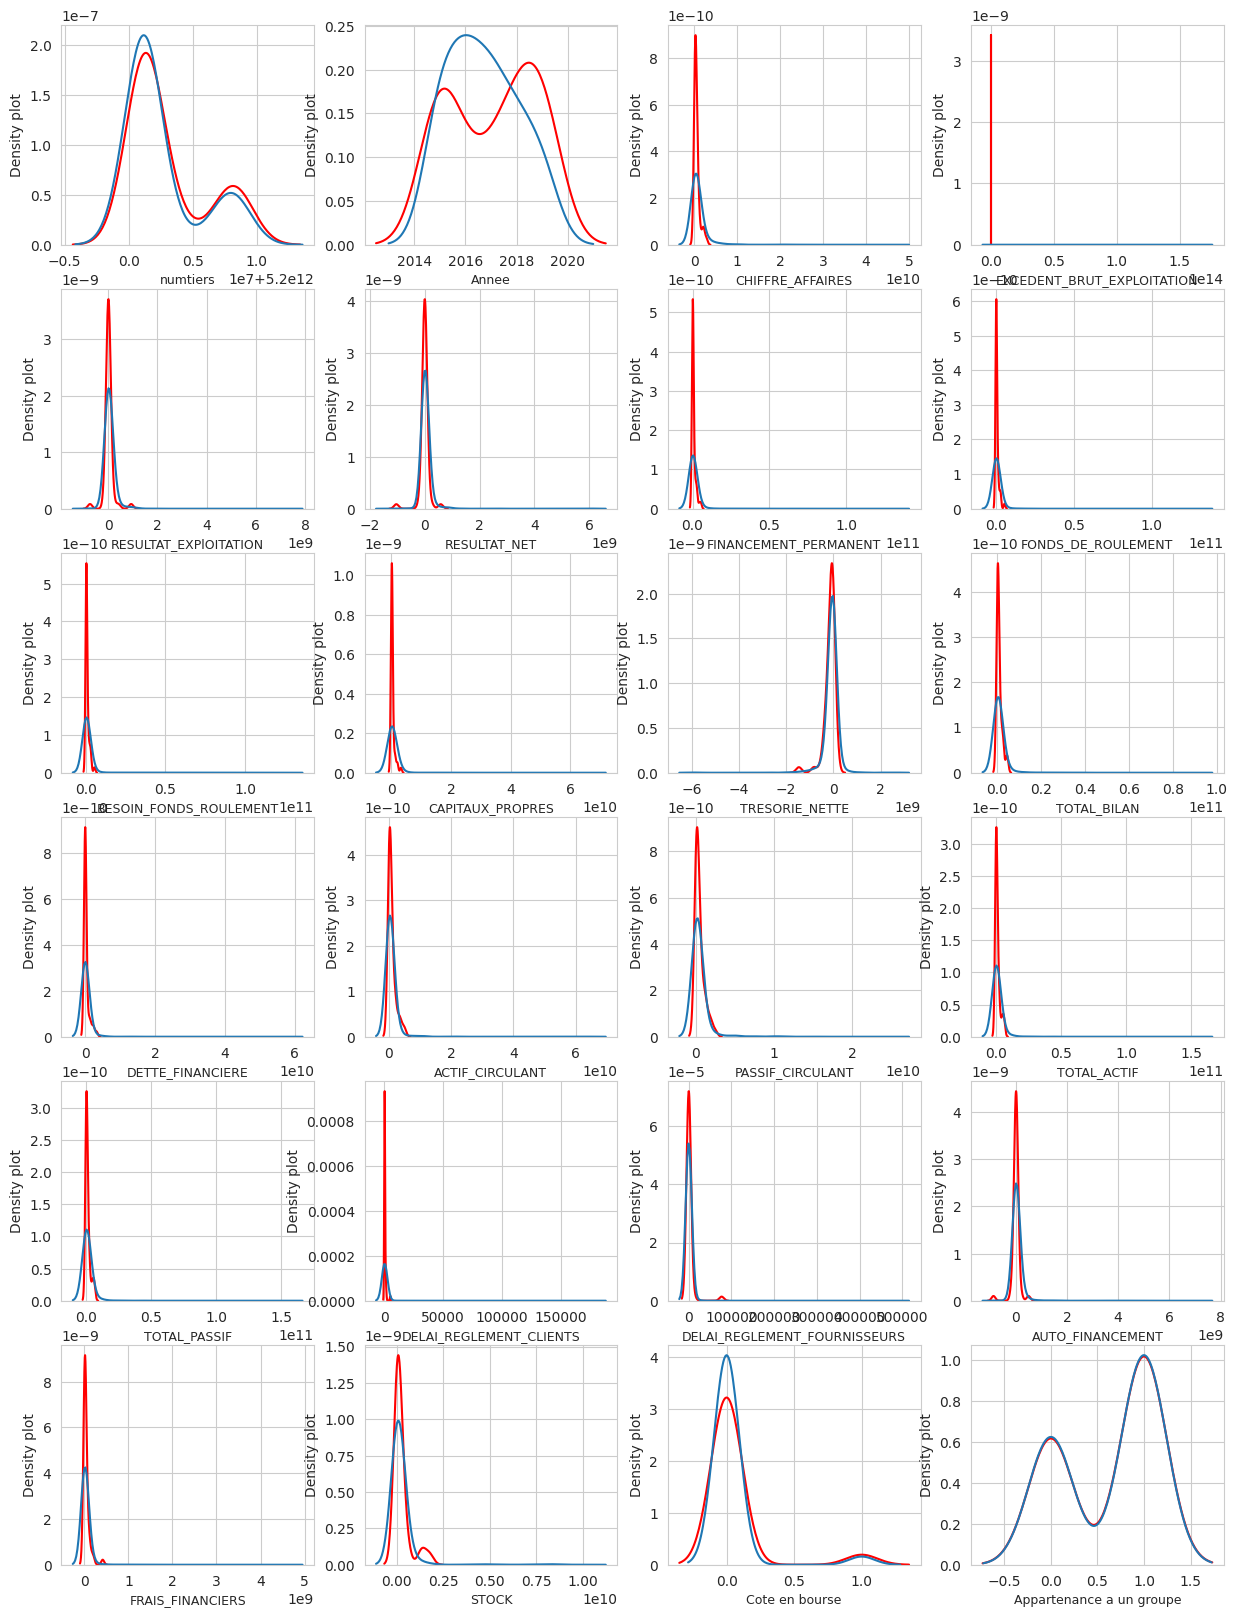

In [ ]:
def plot_distribution(var):
    i = 0
    t1 = df.loc[df['defaut'] != 0]
    t0 = df.loc[df['defaut'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(8,3,figsize=(15,20))

    for feature in var :
        i += 1
        plt.subplot(6,4,i)
        sns.kdeplot(t1[feature], bw=0.5,color='red',label="defaut = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="defaut = 0")
        plt.ylabel('Density plot', fontsize=10)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=10)
    plt.show();

plot_distribution([i for i in numeric_features if i!='defaut'])

## EDA

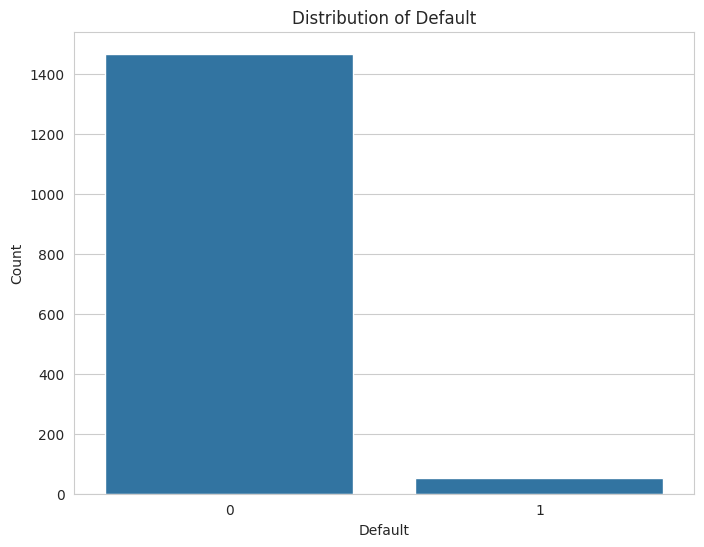

In [ ]:
import seaborn as sns

# Plot barplot for the distribution of 'defaut'
plt.figure(figsize=(8, 6))
sns.countplot(x='defaut', data=df)
plt.title('Distribution of Default')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()


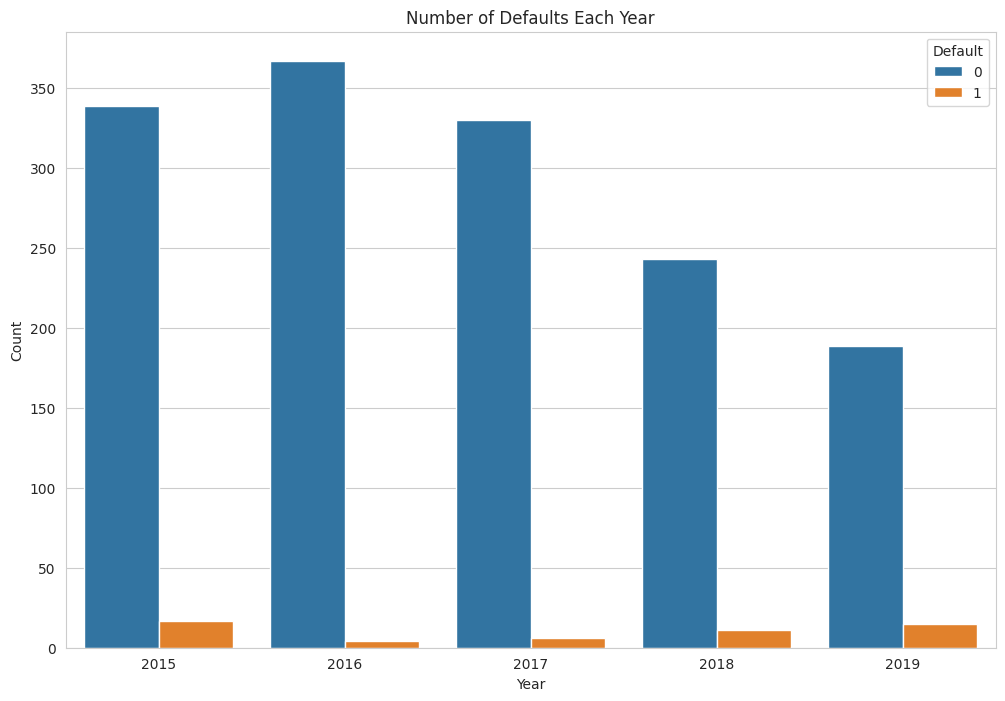

In [ ]:
# Plot barplot for the number of defaults each year
plt.figure(figsize=(12, 8))
sns.countplot(x='Annee', hue='defaut', data=df)
plt.title('Number of Defaults Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Default', loc='upper right')
plt.show()


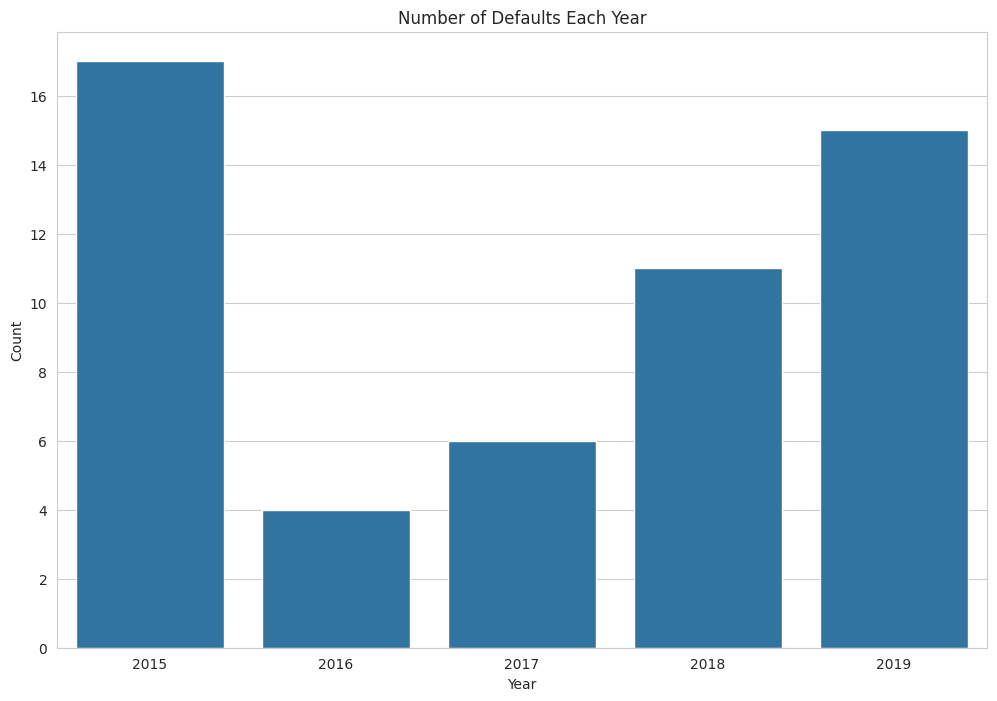

In [ ]:
# Filter DataFrame to include only rows where 'defaut' equals 1
default_df = df[df['defaut'] == 1]

# Plot barplot for the number of defaults each year
plt.figure(figsize=(12, 8))
sns.countplot(x='Annee', data=default_df)
plt.title('Number of Defaults Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


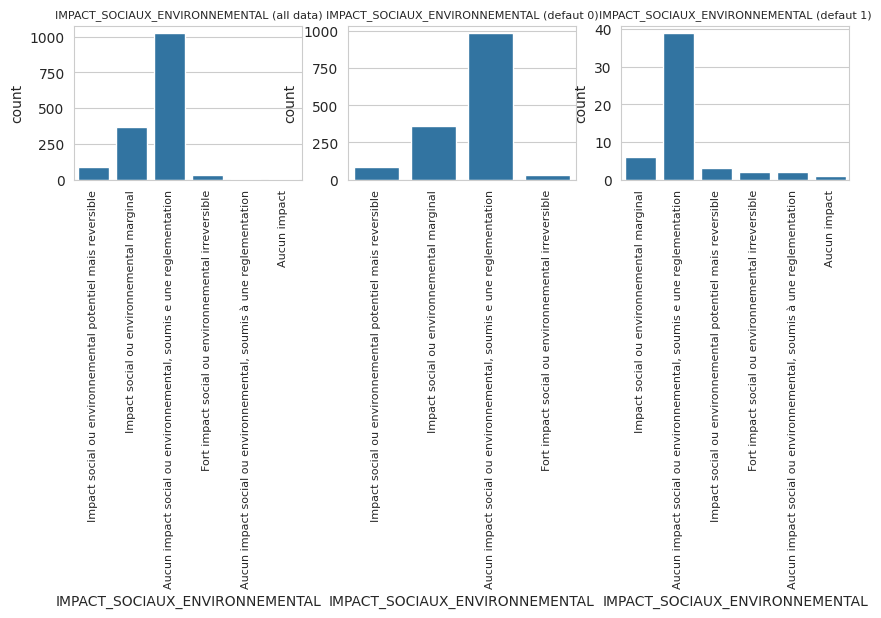

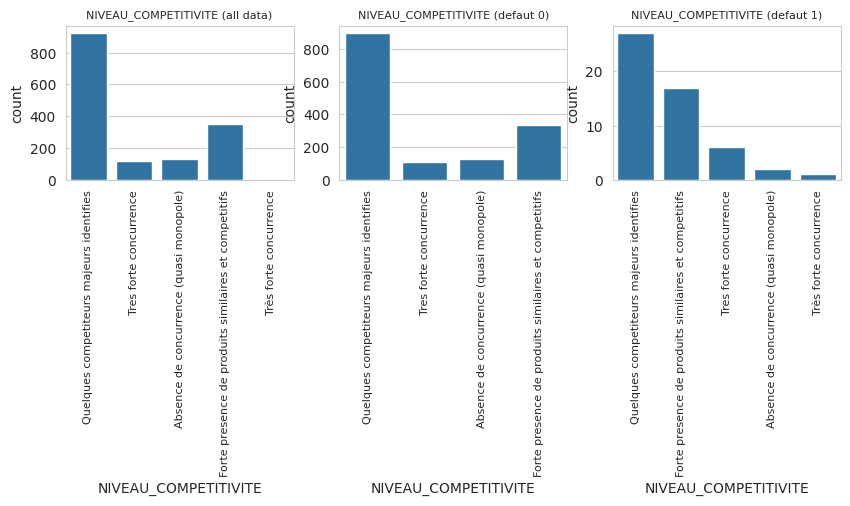

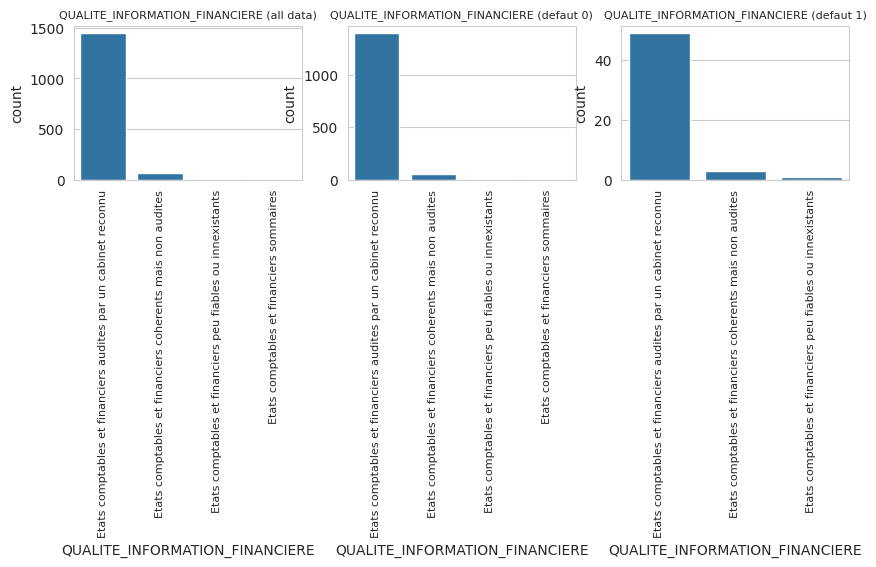

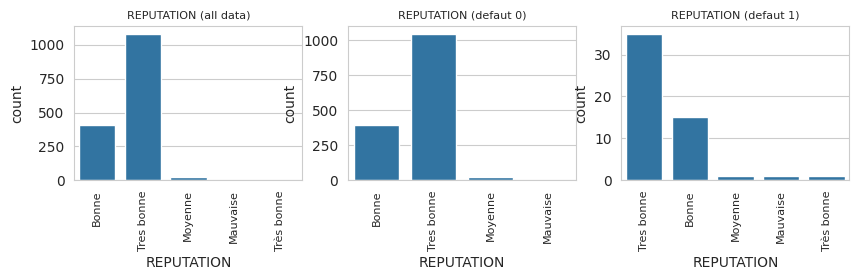

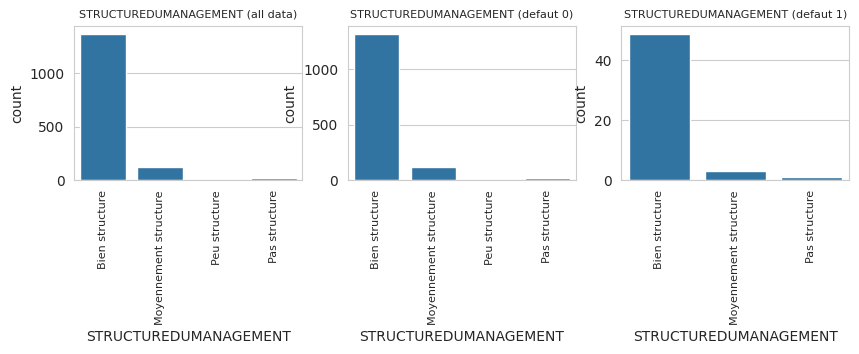

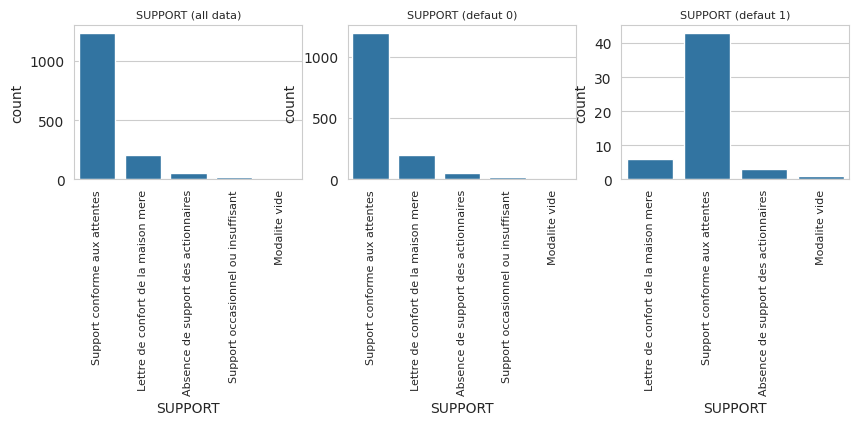

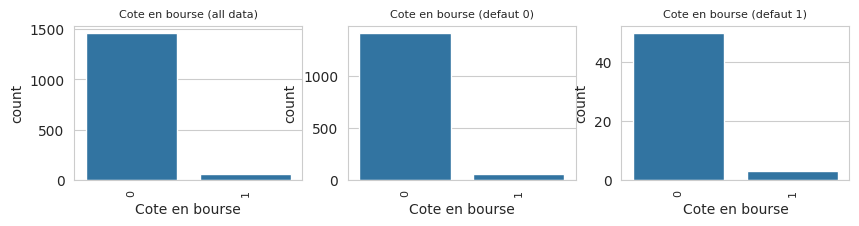

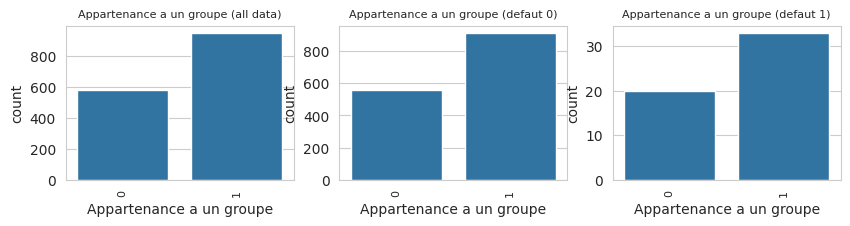

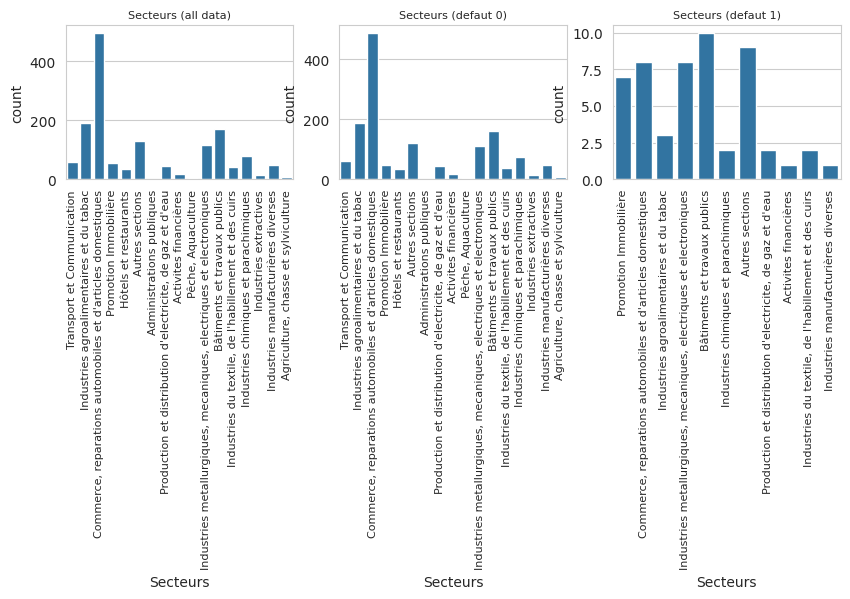

In [ ]:
columns =['IMPACT_SOCIAUX_ENVIRONNEMENTAL',
       'NIVEAU_COMPETITIVITE', 'QUALITE_INFORMATION_FINANCIERE', 'REPUTATION',
       'STRUCTUREDUMANAGEMENT', 'SUPPORT',
       'Cote en bourse', 'Appartenance a un groupe',
       'Secteurs']

for column in columns:
    figure, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 2))

    sns.countplot(x=column, data=df, ax=ax[0])
    ax[0].set_title(column + ' (all data)', fontsize=8)
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, fontsize=8)

    sns.countplot(x=column, data=df[df['defaut'] == 0], ax=ax[1])
    ax[1].set_title(column + ' (defaut 0)', fontsize=8)
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, fontsize=8)

    sns.countplot(x=column, data=df[df['defaut'] == 1], ax=ax[2])
    ax[2].set_title(column + ' (defaut 1)', fontsize=8)
    ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90, fontsize=8)

    plt.show()

In [ ]:
# Crosstabulation of variables with the target variable 'defaut'
cross_tab = pd.crosstab(index=df['Categorie_juridique'], columns=df['defaut'])
pd.DataFrame(cross_tab)

defaut,0,1
Categorie_juridique,,
Autres forme juridique,4,0
SA,1052,36
SARL,412,17


In [ ]:
# Crosstabulation of variables with the target variable 'defaut'
cross_tab = pd.crosstab(index=df['Cote en bourse'], columns=df['defaut'])
pd.DataFrame(cross_tab)

defaut,0,1
Cote en bourse,,
0,1413,50
1,55,3


In [ ]:
# Crosstabulation of variables with the target variable 'defaut'
cross_tab = pd.crosstab(index=df['DIVERSITE_CLIENTS'], columns=df['defaut'])
pd.DataFrame(cross_tab)

defaut,0,1
DIVERSITE_CLIENTS,,
Bonne diversification par produits mais limitee e une zone geographique ou e quelques client,303,10
Diversification limitee e un seul client ou un seul produit ou e une seule zone geographique,19,0
"Diversification tres forte par produits, clients, situation geographique",1108,38
"Diversification très forte par produits, clients, situation geographique",0,1
"Diversification très forte par produits,clients, situation geographique",0,1
Forte dependance e quelques clients mais limitee e un seul produit,38,2
Modalite vide,0,1


In [ ]:
# Crosstabulation of variables with the target variable 'defaut'
cross_tab = pd.crosstab(index=df['DIVERSITE_FOURNISSEURS'], columns=df['defaut'])
pd.DataFrame(cross_tab)

defaut,0,1
DIVERSITE_FOURNISSEURS,,
Diversite insufisante,35,3
Diversite moyenne,724,21
Modalite vide,4,0
Pas de diversite,32,1
Tres grande diversite,673,26
Très grande diversite,0,2


In [ ]:
# Crosstabulation of variables with the target variable 'defaut'
cross_tab = pd.crosstab(index=df['IMPACT_SOCIAUX_ENVIRONNEMENTAL'], columns=df['defaut'])
pd.DataFrame(cross_tab)

defaut,0,1
IMPACT_SOCIAUX_ENVIRONNEMENTAL,,
Aucun impact,0,1
"Aucun impact social ou environnemental, soumis e une reglementation",987,39
"Aucun impact social ou environnemental, soumis à une reglementation",0,2
Fort impact social ou environnemental irreversible,32,2
Impact social ou environnemental marginal,363,6
Impact social ou environnemental potentiel mais reversible,86,3


In [ ]:
# Crosstabulation of variables with the target variable 'defaut'
cross_tab = pd.crosstab(index=df['NIVEAU_COMPETITIVITE'], columns=df['defaut'])
pd.DataFrame(cross_tab)

defaut,0,1
NIVEAU_COMPETITIVITE,,
Absence de concurrence (quasi monopole),126,2
Forte presence de produits similaires et competitifs,337,17
Quelques competiteurs majeurs identifies,895,27
Tres forte concurrence,110,6
Très forte concurrence,0,1


In [ ]:
# Crosstabulation of variables with the target variable 'defaut'
cross_tab = pd.crosstab(index=df['QUALITE_INFORMATION_FINANCIERE'], columns=df['defaut'])
pd.DataFrame(cross_tab)

defaut,0,1
QUALITE_INFORMATION_FINANCIERE,,
Etats comptables et financiers audites par un cabinet reconnu,1400,49
Etats comptables et financiers coherents mais non audites,58,3
Etats comptables et financiers peu fiables ou innexistants,6,1
Etats comptables et financiers sommaires,4,0


In [ ]:
# Crosstabulation of variables with the target variable 'defaut'
cross_tab = pd.crosstab(index=df['REPUTATION'], columns=df['defaut'])
pd.DataFrame(cross_tab)

defaut,0,1
REPUTATION,,
Bonne,392,15
Mauvaise,3,1
Moyenne,25,1
Tres bonne,1048,35
Très bonne,0,1


In [ ]:
# Crosstabulation of variables with the target variable 'defaut'
cross_tab = pd.crosstab(index=df['STRUCTUREDUMANAGEMENT'], columns=df['defaut'])
pd.DataFrame(cross_tab)

defaut,0,1
STRUCTUREDUMANAGEMENT,,
Bien structure,1324,49
Moyennement structure,123,3
Pas structure,16,1
Peu structure,5,0


In [ ]:
# Crosstabulation of variables with the target variable 'defaut'
cross_tab = pd.crosstab(index=df['SUPPORT'], columns=df['defaut'])
pd.DataFrame(cross_tab)

defaut,0,1
SUPPORT,,
Absence de support des actionnaires,50,3
Lettre de confort de la maison mere,203,6
Modalite vide,3,1
Support conforme aux attentes,1195,43
Support occasionnel ou insuffisant,17,0


In [ ]:
# Crosstabulation of variables with the target variable 'defaut'
cross_tab = pd.crosstab(index=df['POSITIONNEMENTMARCHE'], columns=df['defaut'])
pd.DataFrame(cross_tab)

defaut,0,1
POSITIONNEMENTMARCHE,,
Acteur majeur + de 20% de part de marche,967,36
Acteur marginal,8,1
Acteur non significatif,122,3
Leader,371,13


In [ ]:
# Crosstabulation of variables with the target variable 'defaut'
cross_tab = pd.crosstab(index=df['Appartenance a un groupe'], columns=df['defaut'])
pd.DataFrame(cross_tab)

defaut,0,1
Appartenance a un groupe,,
0,556,20
1,912,33


In [ ]:
# Crosstabulation of variables with the target variable 'defaut'
cross_tab = pd.crosstab(index=df['Secteurs'], columns=df['defaut'])
pd.DataFrame(cross_tab)

defaut,0,1
Secteurs,,
Activites financières,19,1
Administrations publiques,1,0
"Agriculture, chasse et sylviculture",9,0
Autres sections,121,9
Bâtiments et travaux publics,162,10
"Commerce, reparations automobiles et d'articles domestiques",489,8
Hôtels et restaurants,36,0
Industries agroalimentaires et du tabac,187,3
Industries chimiques et parachimiques,76,2


# Survival Curve

In [ ]:
# Count total observations for each year
total_obs = df.groupby('Annee').size()

# Count occurrences of defaut=1 for each year
defaut_counts = df[df['defaut'] == 1].groupby('Annee').size()

# Calculate default rate
default_rate = (defaut_counts / total_obs).round(4)

# Calculate survival probability
survival_probability = (1 - default_rate).round(4)

# Create DataFrame with default rate and survival probability
result = pd.concat([total_obs, defaut_counts, default_rate, survival_probability], axis=1)
result.columns = ['Total Observations', 'Total defaut=1', 'Default Rate', 'Survival Probability']

# Calculate cumulative survival probability
result['Cumulative Survival Probability'] = result['Survival Probability'].cumprod().round(4)

# Convert DataFrame to a tabular format and print
print(tabulate(result, headers='keys', tablefmt='pretty'))

+-------+--------------------+----------------+--------------+----------------------+---------------------------------+
| Annee | Total Observations | Total defaut=1 | Default Rate | Survival Probability | Cumulative Survival Probability |
+-------+--------------------+----------------+--------------+----------------------+---------------------------------+
| 2015  |       356.0        |      17.0      |    0.0478    |        0.9522        |             0.9522              |
| 2016  |       371.0        |      4.0       |    0.0108    |        0.9892        |             0.9419              |
| 2017  |       336.0        |      6.0       |    0.0179    |        0.9821        |             0.9251              |
| 2018  |       254.0        |      11.0      |    0.0433    |        0.9567        |              0.885              |
| 2019  |       204.0        |      15.0      |    0.0735    |        0.9265        |              0.82               |
+-------+--------------------+----------

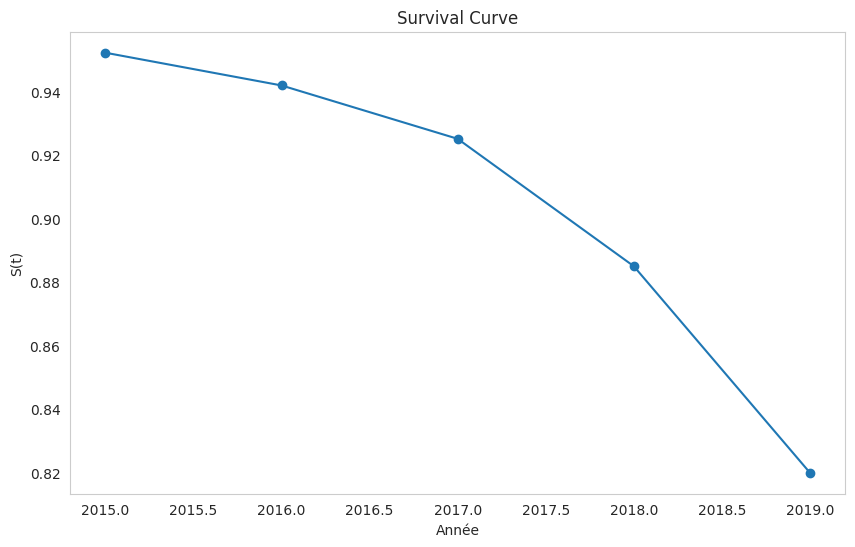

In [ ]:
Survival_curve= {
  'Annee': [int(x) for x in [2015, 2016, 2017, 2018, 2019]],
  'defaut': [0, 0, 0, 0, 0],
  0: [339, 367, 330, 243, 189],
  1: [17, 4, 6, 11, 15],
  'n': [356, 371, 336, 254, 204],
  'd': [0.0478, 0.0108, 0.0179, 0.0433, 0.0735],
  's': [0.9522, 0.9892, 0.9821, 0.9567, 0.9265],
  'S': [0.9522, 0.9419, 0.9251, 0.885, 0.82]
}


result = pd.DataFrame(Survival_curve)

plt.figure(figsize=(10, 6))
plt.plot(result['Annee'], result['S'], marker='o')
plt.xlabel('Année')
plt.ylabel('S(t)')
plt.title('Survival Curve')
plt.grid(False)
plt.show()

**Supprimer les modaliés vides et les redoublements**

In [ ]:
df.select_dtypes('O').nunique().sort_values()

Categorie_juridique                           3
EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT       4
QUALITE_INFORMATION_FINANCIERE                4
STRUCTUREDUMANAGEMENT                         4
POSITIONNEMENTMARCHE                          4
NIVEAU_COMPETITIVITE                          5
REPUTATION                                    5
SUPPORT                                       5
DIVERSITE_FOURNISSEURS                        6
IMPACT_SOCIAUX_ENVIRONNEMENTAL                6
DIVERSITE_CLIENTS                             7
Secteurs                                     17
NUMTIERS_ANNEE                             1521
dtype: int64

In [ ]:
for feature in categorical_features:
    if feature != 'NUMTIERS_ANNEE':
       print(' Les modalités de' ,feature,set(df[feature]),'\n')

 Les modalités de EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT {'Modalite vide', 'Plus de 10 ans', 'Inferieure e 5 ans', 'Entre 5 et 10 ans'} 

 Les modalités de DIVERSITE_CLIENTS {'Bonne diversification par produits mais limitee e une zone geographique ou e quelques client', 'Forte dependance e quelques clients mais limitee e un seul produit', 'Diversification tres forte par produits, clients, situation geographique', 'Modalite vide', 'Diversification limitee e un seul client ou un seul produit ou e une seule zone geographique', 'Diversification très forte par produits,clients, situation geographique', 'Diversification très forte par produits, clients, situation geographique'} 

 Les modalités de DIVERSITE_FOURNISSEURS {'Diversite moyenne', 'Tres grande diversite', 'Modalite vide', 'Pas de diversite', 'Diversite insufisante', 'Très grande diversite'} 

 Les modalités de IMPACT_SOCIAUX_ENVIRONNEMENTAL {'Aucun impact', 'Aucun impact social ou environnemental, soumis à une reglementation', 'I

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Créez un objet SimpleImputer avec la stratégie "most_frequent" en utilisant np.nan pour les valeurs manquantes
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Appliquez l'imputation sur les colonnes avec des valeurs manquantes dans votre DataFrame
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Assurez-vous que les colonnes numériques sont de type float64 après l'imputation
df[numeric_features] = df[numeric_features].astype('float64')



D'après la vérification de la qualité des données, nous avons distingué qu'il n'y
a pas de variables manquantes, mais plutôt des variables aberrantes, ainsi
qu'une redondance de variables et des modalités vides.
Nous avons remplacé les modalités vides directement en utilisant la stratégie
du mode (most frequent). De plus, nous avons consolidé les redondances en
une seule modalité.


In [ ]:
dfy=df.copy()

In [ ]:
a = "Diversification tres forte par produits, clients, situation geographique"
b = "Diversification très forte par produits,clients, situation geographique"
c = 'Diversification très forte par produits, clients, situation geographique'
df = df.replace([b,c], a)

df = df.replace("Très grande diversite", "Tres grande diversite")

df = df.replace(["Aucun impact social ou environnemental, soumis e une reglementation",'Aucun impact social ou environnemental, soumis à une reglementation' ,"Aucun impact"], "Aucun impact")

df = df.replace('Tres bonne', "Très bonne")

df = df.replace('Tres forte concurrence', 'Très forte concurrence')

df = df.replace('modalité1', "modalité2")

df = df.drop(columns=['DATE_DE_CREATION_TIERS', 'DATE_DE_CREATION_ENTREP'])

In [ ]:
print(df["DIVERSITE_CLIENTS"].value_counts())
print(df["DIVERSITE_FOURNISSEURS"].value_counts())
print(df["IMPACT_SOCIAUX_ENVIRONNEMENTAL"].value_counts())
print(df["REPUTATION"].value_counts())
print(df["NIVEAU_COMPETITIVITE"].value_counts())

DIVERSITE_CLIENTS
Diversification tres forte par produits, clients, situation geographique                        1148
Bonne diversification par produits mais limitee e une zone geographique ou e quelques client     313
Forte dependance e quelques clients mais limitee e un seul produit                                40
Diversification limitee e un seul client ou un seul produit ou e une seule zone geographique      19
Modalite vide                                                                                      1
Name: count, dtype: int64
DIVERSITE_FOURNISSEURS
Diversite moyenne        745
Tres grande diversite    701
Diversite insufisante     38
Pas de diversite          33
Modalite vide              4
Name: count, dtype: int64
IMPACT_SOCIAUX_ENVIRONNEMENTAL
Aucun impact                                                  1029
Impact social ou environnemental marginal                      369
Impact social ou environnemental potentiel mais reversible      89
Fort impact social ou env

## Data Preprocessing

##### now we shall creat multiple variables that indicate the Ratios

In [ ]:
df.columns

Index(['numtiers', 'Annee', 'NUMTIERS_ANNEE', 'defaut', 'CHIFFRE_AFFAIRES',
       'EXCEDENT_BRUT_EXPLOITATION', 'RESULTAT_EXPlOITATION', 'RESULTAT_NET',
       'FINANCEMENT_PERMANENT', 'FONDS_DE_ROULEMENT', 'BESOIN_FONDS_ROULEMENT',
       'CAPITAUX_PROPRES', 'TRESORIE_NETTE', 'TOTAL_BILAN', 'DETTE_FINANCIERE',
       'ACTIF_CIRCULANT', 'PASSIF_CIRCULANT', 'TOTAL_ACTIF', 'TOTAL_PASSIF',
       'DELAI_REGLEMENT_CLIENTS', 'DELAI_REGLEMENT_FOURNISSEURS',
       'AUTO_FINANCEMENT', 'FRAIS_FINANCIERS', 'STOCK',
       'EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT', 'DIVERSITE_CLIENTS',
       'DIVERSITE_FOURNISSEURS', 'IMPACT_SOCIAUX_ENVIRONNEMENTAL',
       'NIVEAU_COMPETITIVITE', 'QUALITE_INFORMATION_FINANCIERE', 'REPUTATION',
       'STRUCTUREDUMANAGEMENT', 'SUPPORT', 'POSITIONNEMENTMARCHE',
       'Categorie_juridique', 'Cote en bourse', 'Appartenance a un groupe',
       'Secteurs'],
      dtype='object')

In [ ]:

df['RLG']=df['ACTIF_CIRCULANT']/df['PASSIF_CIRCULANT']

df['RCP']=df['CAPITAUX_PROPRES']/df['TOTAL_PASSIF']

df['RAF']=df['CAPITAUX_PROPRES']/df['FINANCEMENT_PERMANENT']

df['MBE']=df['EXCEDENT_BRUT_EXPLOITATION']/df['CHIFFRE_AFFAIRES']

df['RF']=df['RESULTAT_NET']/df['CAPITAUX_PROPRES']

df['RE']=df['RESULTAT_NET']/df['TOTAL_ACTIF']

df['RTN']=df['TRESORIE_NETTE']/df['TOTAL_ACTIF']

df['TFP']=df['FINANCEMENT_PERMANENT']/df['TOTAL_ACTIF']

df['TFP']=df['AUTO_FINANCEMENT']/df['CHIFFRE_AFFAIRES']

df['RCL']=df['CHIFFRE_AFFAIRES']/df['DELAI_REGLEMENT_CLIENTS']

df['RCL']=df['STOCK']/df['DELAI_REGLEMENT_FOURNISSEURS']

df['RD'] = df['CAPITAUX_PROPRES'] / df['TOTAL_PASSIF']


In [ ]:
variables = ['RLG', 'RCP', 'RAF', 'MBE', 'RF', 'RE', 'RTN', 'TFP', 'RCL','RD']
# Calcul des statistiques descriptives
descriptive_stats = df[variables].describe()

descriptive_stats


,RLG,RCP,RAF,MBE,RF,RE,RTN,TFP,RCL,RD
count,1521.000000,1520.000000,1520.000000,1521.000000,1520.000000,1520.000000,1520.000000,1521.000000,1.520000e+03,1520.000000
mean,inf,0.289734,0.811022,19.487807,inf,inf,-inf,-0.032444,inf,0.289734
std,NaN,0.228017,0.338043,757.468159,NaN,NaN,NaN,1.486504,NaN,0.228017
min,0.000000,-2.990561,-3.274683,-26.270117,-23.986578,-1.276431,-inf,-47.908636,0.000000e+00,-2.990561
25%,1.228258,0.153674,0.679141,0.028577,0.033434,0.006532,-0.258189,0.007724,1.982037e+05,0.153674
50%,1.701965,0.258154,0.901046,0.060557,0.088331,0.019494,-0.111209,0.025096,5.657857e+05,0.258154
75%,2.312766,0.412084,1.000000,0.107943,0.183212,0.050320,0.003096,0.058443,1.366702e+06,0.412084
max,inf,0.962572,6.532580,29541.295457,inf,inf,0.670193,6.050585,inf,0.962572


**Winsorising**

In [ ]:
# Calculer le quartile de 0.99 pour chaque ratio
quantile_99 = df[['RLG', 'RCP', 'RAF', 'MBE', 'RF', 'RE', 'RTN', 'TFP', 'RCL', 'RD']].quantile(0.99)

# Remplacer les valeurs aberrantes par le quartile de 0.99
df[['RLG', 'RCP', 'RAF', 'MBE', 'RF', 'RE', 'RTN', 'TFP', 'RCL', 'RD']] = df[['RLG', 'RCP', 'RAF', 'MBE', 'RF', 'RE', 'RTN', 'TFP', 'RCL', 'RD']].apply(lambda x: x.mask(x > quantile_99[x.name], quantile_99[x.name]))

# Afficher un résumé statistique des ratios avec les valeurs aberrantes remplacées
stats_table_cleaned = df[['RLG', 'RCP', 'RAF', 'MBE', 'RF', 'RE', 'RTN', 'TFP', 'RCL', 'RD']].describe()
pd.DataFrame(stats_table_cleaned)

,RLG,RCP,RAF,MBE,RF,RE,RTN,TFP,RCL,RD
count,1521.000000,1520.000000,1520.000000,1521.000000,1520.000000,1520.000000,1520.000000,1521.000000,1.520000e+03,1520.000000
mean,2.059536,0.289189,0.799447,0.043081,0.082167,0.027316,-inf,-0.046324,1.858332e+06,0.289189
std,1.619768,0.226643,0.280563,0.784721,0.837149,0.078057,NaN,1.465948,4.466459e+06,0.226643
min,0.000000,-2.990561,-3.274683,-26.270117,-23.986578,-1.276431,-inf,-47.908636,0.000000e+00,-2.990561
25%,1.228258,0.153674,0.679141,0.028577,0.033434,0.006532,-0.258189,0.007724,1.982037e+05,0.153674
50%,1.701965,0.258154,0.901046,0.060557,0.088331,0.019494,-0.111209,0.025096,5.657857e+05,0.258154
75%,2.312766,0.412084,1.000000,0.107943,0.183212,0.050320,0.003096,0.058443,1.366702e+06,0.412084
max,12.381110,0.819309,1.002588,0.736786,1.523547,0.270394,0.400469,0.506842,3.188234e+07,0.819309


In [ ]:
df[['RLG', 'RCP', 'RAF', 'MBE', 'RF', 'RE', 'RTN', 'TFP', 'RCL', 'RD']].isna().sum().sort_values()

RLG    0
MBE    0
TFP    0
RCP    1
RAF    1
RF     1
RE     1
RTN    1
RCL    1
RD     1
dtype: int64

In [ ]:
df['RCP'].fillna(df['RCP'].mean(), inplace=True)
df['RAF'].fillna(df['RAF'].mean(), inplace=True)
df['RF'].fillna(df['RF'].mean(), inplace=True)
df['RE'].fillna(df['RE'].mean(), inplace=True)
df['RTN'].fillna(df['RTN'].mean(), inplace=True)
df['RCL'].fillna(df['RCL'].mean(), inplace=True)
df['RD'].fillna(df['RCL'].mean(), inplace=True)

df.head(2)

,numtiers,Annee,NUMTIERS_ANNEE,defaut,CHIFFRE_AFFAIRES,EXCEDENT_BRUT_EXPLOITATION,RESULTAT_EXPlOITATION,RESULTAT_NET,FINANCEMENT_PERMANENT,FONDS_DE_ROULEMENT,...,RLG,RCP,RAF,MBE,RF,RE,RTN,TFP,RCL,RD
0,5.200000e+12,2015.0,5200000007513_2015,0.0,236073240.2,8258201.71,7120503.00,-14040379.78,98670394.75,81519577.20,...,1.989460,0.466445,0.957609,0.034982,-0.148595,-0.069311,-0.140121,-0.018773,0.0,0.466445
1,5.200000e+12,2016.0,5200000007513_2016,0.0,258386615.0,4107268.85,2031311.93,2312466.82,98615613.61,95726090.85,...,1.920346,0.465513,0.981591,0.015896,0.023889,0.011121,-0.141271,0.001836,0.0,0.465513


**Discretisation**

In [ ]:
import pandas as pd

# Liste des ratios à discrétiser
ratios = ['RLG', 'RCP', 'RAF', 'MBE', 'RF', 'RE', 'RTN', 'TFP', 'RCL','RD']

# Définir le nombre de catégories pour la discrétisation
num_bins = 3

# Discrétiser les ratios en catégories en utilisant qcut
for ratio in ratios:
    df[f'{ratio}_discretized'] = pd.qcut(df[ratio], q=num_bins, labels=False)

# Afficher les premières lignes du DataFrame avec les ratios discrétisés
pd.DataFrame(df.head(5))


,numtiers,Annee,NUMTIERS_ANNEE,defaut,CHIFFRE_AFFAIRES,EXCEDENT_BRUT_EXPLOITATION,RESULTAT_EXPlOITATION,RESULTAT_NET,FINANCEMENT_PERMANENT,FONDS_DE_ROULEMENT,...,RLG_discretized,RCP_discretized,RAF_discretized,MBE_discretized,RF_discretized,RE_discretized,RTN_discretized,TFP_discretized,RCL_discretized,RD_discretized
0,5.200000e+12,2015.0,5200000007513_2015,0.0,236073240.2,8258201.71,7120503.00,-14040379.78,98670394.75,81519577.20,...,1,2,1,0,0,0,1.0,0,0,2
1,5.200000e+12,2016.0,5200000007513_2016,0.0,258386615.0,4107268.85,2031311.93,2312466.82,98615613.61,95726090.85,...,1,2,1,0,0,1,1.0,0,0,2
2,5.200000e+12,2015.0,5200000007934_2015,0.0,202426475.2,5028464.60,3602225.77,-413273.04,25786354.28,25292672.24,...,1,1,2,0,0,0,2.0,0,0,1
3,5.200000e+12,2017.0,5200000007934_2017,0.0,210917616.4,13076487.89,12514233.63,7501946.85,43636340.95,43556340.95,...,2,2,2,1,2,2,2.0,1,0,2
4,5.200000e+12,2015.0,5200000008051_2015,0.0,171987524.1,16142629.85,12544851.82,1401029.14,55186477.68,55087777.68,...,1,1,1,2,0,0,NaN,1,0,1


**Secteur**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Créer une instance de LabelEncoder
label_encoder = LabelEncoder()

dfr=pd.DataFrame()
# Encoder les données de la colonne 'secteur'
dfr['secteur_encoded'] = label_encoder.fit_transform(df['Secteurs'])

# Définir les limites pour les classes
limites = [dfr['secteur_encoded'].quantile(q) for q in [1/3, 2/3]]

# Fonction pour attribuer la classe en fonction de la modalité
def assigner_classe(modalite):
    if modalite <= limites[0]:
        return 'Classe 1'
    elif modalite <= limites[1]:
        return 'Classe 2'
    else:
        return 'Classe 3'

# Appliquer la fonction pour créer une nouvelle colonne de classe 'secteur_classe'
df['secteur_classe'] = dfr['secteur_encoded'].apply(assigner_classe)

# Afficher les premières lignes du DataFrame pour vérifier les modifications
pd.DataFrame(df[['Secteurs','secteur_classe']])

,Secteurs,secteur_classe
0,Transport et Communication,Classe 3
1,Transport et Communication,Classe 3
2,Industries agroalimentaires et du tabac,Classe 2
3,Industries agroalimentaires et du tabac,Classe 2
4,"Commerce, reparations automobiles et d'article...",Classe 1
...,...,...
1516,Autres sections,Classe 1
1517,"Commerce, reparations automobiles et d'article...",Classe 1
1518,Industries manufacturières diverses,Classe 3
1519,"Industries metallurgiques, mecaniques, electri...",Classe 3


**Selection des variable**

In [ ]:
def calculate_iv(df, target):
    def calculate_woe_iv(feature_data, target_data):
        total_events = sum(target_data)
        total_non_events = len(target_data) - total_events
        woe_iv = 0
        for value in feature_data.unique():
            event_count = sum(target_data[feature_data == value])
            non_event_count = len(feature_data[feature_data == value]) - event_count
            if event_count == 0 or non_event_count == 0:
                continue
            proportion_of_events = event_count / total_events
            proportion_of_non_events = non_event_count / total_non_events
            woe = np.log(proportion_of_events / proportion_of_non_events)
            iv = (proportion_of_events - proportion_of_non_events) * woe
            woe_iv += iv
        return woe_iv

    iv_values = {}
    for feature in df.columns:
        if feature != target:
            feature_data = df[feature]
            target_data = df[target]
            if feature_data.dtype == 'object':
                feature_data = feature_data.astype('category').cat.codes
            iv_values[feature] = calculate_woe_iv(feature_data, target_data)

    return iv_values

# Appliquer la fonction calculate_iv à votre DataFrame
iv_results = calculate_iv(df, target='defaut')

# Filtrer les résultats pour ne conserver que les variables avec IV > 0.1
selected_variables = {variable: iv for variable, iv in iv_results.items() if iv > 0.1}

# Afficher les variables sélectionnées avec leur IV
for variable, iv in selected_variables.items():
    # Création d'un DataFrame à partir du dictionnaire selected_variables
     dfff = pd.DataFrame(selected_variables.items(), columns=['Variable', 'IV'])

# Affichage du DataFrame sous forme de tableau
dfff


,Variable,IV
0,numtiers,2.098653
1,Annee,0.446114
2,DETTE_FINANCIERE,0.106819
3,DELAI_REGLEMENT_CLIENTS,0.120809
4,IMPACT_SOCIAUX_ENVIRONNEMENTAL,0.133300
5,NIVEAU_COMPETITIVITE,0.120420
6,Secteurs,0.515095
7,MBE_discretized,0.198668
8,RF_discretized,0.386018
9,RE_discretized,0.271748


In [ ]:
import numpy as np

# Calculer le nombre d'événements (1) et de non-événements (0) pour chaque catégorie
event_counts = df.groupby('RF_discretized')['defaut'].sum()
non_event_counts = df.groupby('RF_discretized')['defaut'].count() - event_counts

# Calculer le WoE pour chaque catégorie
woe_df = pd.DataFrame(index=event_counts.index)
woe_df['Event'] = event_counts
woe_df['Non-Event'] = non_event_counts
woe_df['Total'] = woe_df['Event'] + woe_df['Non-Event']
woe_df['Proportion_Event'] = woe_df['Event'] / woe_df['Event'].sum()
woe_df['Proportion_Non-Event'] = woe_df['Non-Event'] / woe_df['Non-Event'].sum()
woe_df['WoE'] = np.log(woe_df['Proportion_Event'] / woe_df['Proportion_Non-Event'])

# Afficher le tableau
pd.DataFrame(woe_df)

,Event,Non-Event,Total,Proportion_Event,Proportion_Non-Event,WoE
RF_discretized,,,,,,
0,30.0,477.0,507.0,0.566038,0.324932,0.555045
1,17.0,490.0,507.0,0.320755,0.333787,-0.039828
2,6.0,501.0,507.0,0.113208,0.341281,-1.103482


Pour la catégorie "0" de la variable "RF_discretized", le WOE est d'environ 0.555. Cela signifie que cette catégorie a un WOE positif, indiquant une forte association avec l'événement (ou la variable cible). Plus précisément, cette catégorie a une proportion d'événements (défauts) plus élevée par rapport à la proportion d'événements non-défauts, ce qui la rend prédictive de l'événement.

Pour la catégorie "1" de la variable "RF_discretized", le WOE est d'environ -0.040. Un WOE proche de zéro indique que cette catégorie n'a pas de pouvoir discriminant significatif pour prédire l'événement. Dans ce cas, la proportion d'événements est similaire à la proportion d'événements non-défauts, ce qui signifie que cette catégorie n'apporte pas d'information utile pour prédire l'événement.

Pour la catégorie "2" de la variable "RF_discretized", le WOE est d'environ -1.103. Cela indique un WOE négatif, ce qui signifie que cette catégorie est associée à un taux de non-événement (non-défaut) plus élevé par rapport au taux d'événement (défaut). En d'autres termes, cette catégorie est prédictive d'un non-défaut plutôt que d'un défaut.

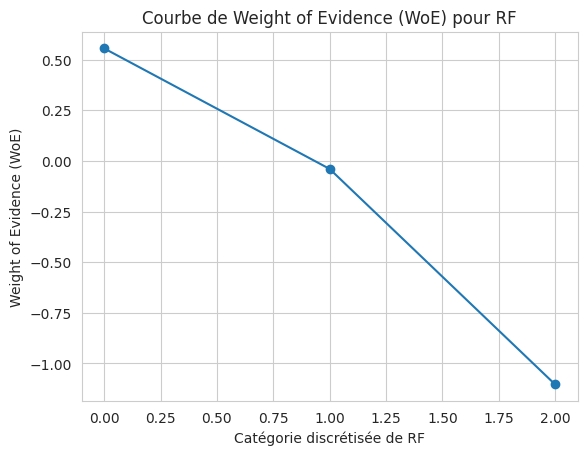

In [ ]:
# Créer une figure et un axe
fig, ax = plt.subplots()

# Tracer la courbe de la Valeur d'Information (IV)
ax.plot(woe_df.index, woe_df['WoE'], marker='o', linestyle='-')

# Ajouter des étiquettes et un titre
ax.set_xlabel('Catégorie discrétisée de RF')
ax.set_ylabel('Weight of Evidence (WoE)')
ax.set_title('Courbe de Weight of Evidence (WoE) pour RF')

# Afficher la grille
ax.grid(True)

# Afficher la figure
plt.show()

In [ ]:
# Calculer le nombre d'événements (1) et de non-événements (0) pour chaque catégorie
event_counts = df.groupby('RE_discretized')['defaut'].sum()
non_event_counts = df.groupby('RE_discretized')['defaut'].count() - event_counts

# Calculer le WoE pour chaque catégorie
woe_df = pd.DataFrame(index=event_counts.index)
woe_df['Event'] = event_counts
woe_df['Non-Event'] = non_event_counts
woe_df['Total'] = woe_df['Event'] + woe_df['Non-Event']
woe_df['Proportion_Event'] = woe_df['Event'] / woe_df['Event'].sum()
woe_df['Proportion_Non-Event'] = woe_df['Non-Event'] / woe_df['Non-Event'].sum()
woe_df['WoE'] = np.log(woe_df['Proportion_Event'] / woe_df['Proportion_Non-Event'])

# Afficher le tableau
pd.DataFrame(woe_df)

,Event,Non-Event,Total,Proportion_Event,Proportion_Non-Event,WoE
RE_discretized,,,,,,
0,29.0,478.0,507.0,0.547170,0.325613,0.519049
1,16.0,491.0,507.0,0.301887,0.334469,-0.102491
2,8.0,499.0,507.0,0.150943,0.339918,-0.811800


Pour la catégorie "0" de la variable "RE_discretized", le WOE est d'environ 0.519. Cela indique une association positive entre cette catégorie et l'événement (ou la variable cible). En d'autres termes, cette catégorie est plus prédictive de l'événement, car elle a une proportion d'événements plus élevée par rapport à la proportion d'événements non-événements.

Pour la catégorie "1" de la variable "RE_discretized", le WOE est d'environ -0.102. Ce WOE proche de zéro suggère une faible association avec l'événement. Les proportions d'événements et de non-événements sont similaires pour cette catégorie, ce qui signifie qu'elle apporte peu d'information pour prédire l'événement.

Pour la catégorie "2" de la variable "RE_discretized", le WOE est d'environ -0.812. Ce WOE négatif indique une association inverse avec l'événement. Cette catégorie est plus prédictive du non-événement, car elle a une proportion plus élevée de non-événements par rapport aux événements.

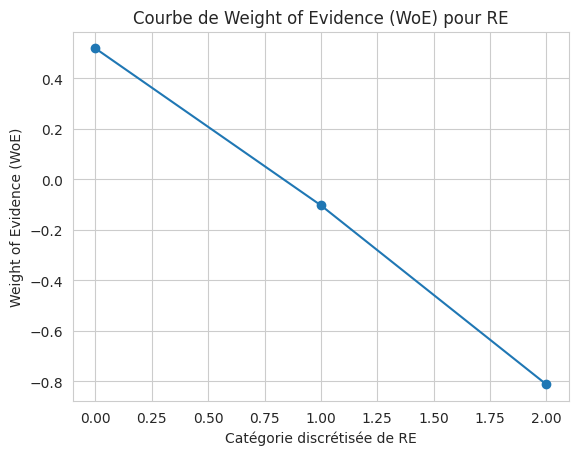

In [ ]:
import matplotlib.pyplot as plt

# Créer une figure et un axe
fig, ax = plt.subplots()

# Tracer la courbe de la Valeur d'Information (IV)
ax.plot(woe_df.index, woe_df['WoE'], marker='o', linestyle='-')

# Ajouter des étiquettes et un titre
ax.set_xlabel('Catégorie discrétisée de RE')
ax.set_ylabel('Weight of Evidence (WoE)')
ax.set_title('Courbe de Weight of Evidence (WoE) pour RE')

# Afficher la grille
ax.grid(True)

# Afficher la figure
plt.show()

Tendance monotone : Une courbe WOE monotone indique une relation monotone entre la variable prédictive et la variable cible. Par exemple, si la courbe WOE monte de gauche à droite, cela suggère une association positive entre la variable prédictive et la variable cible.

Tendance non monotone : Si la courbe WOE présente des fluctuations ou des retournements, cela peut indiquer une relation complexe ou non linéaire entre la variable prédictive et la variable cible. Dans ce cas, il peut être nécessaire d'examiner plus en détail la relation entre les variables.

Force de prédiction : La pente de la courbe WOE reflète la force de prédiction de la variable prédictive. Une pente plus prononcée indique une plus grande capacité prédictive de la variable prédictive.

Détection des points de coupe : Les points où la courbe WOE change de direction peuvent être des points de coupe potentiels pour discrétiser la variable prédictive, ce qui peut améliorer la performance du modèle.

In [ ]:
# Calculer le nombre d'événements (1) et de non-événements (0) pour chaque catégorie
event_counts = df.groupby('RCP_discretized')['defaut'].sum()
non_event_counts = df.groupby('RCP_discretized')['defaut'].count() - event_counts

# Calculer le WoE pour chaque catégorie
woe_df = pd.DataFrame(index=event_counts.index)
woe_df['Event'] = event_counts
woe_df['Non-Event'] = non_event_counts
woe_df['Total'] = woe_df['Event'] + woe_df['Non-Event']
woe_df['Proportion_Event'] = woe_df['Event'] / woe_df['Event'].sum()
woe_df['Proportion_Non-Event'] = woe_df['Non-Event'] / woe_df['Non-Event'].sum()
woe_df['WoE'] = np.log(woe_df['Proportion_Event'] / woe_df['Proportion_Non-Event'])

# Afficher le tableau
pd.DataFrame(woe_df)

,Event,Non-Event,Total,Proportion_Event,Proportion_Non-Event,WoE
RCP_discretized,,,,,,
0,25.0,482.0,507.0,0.471698,0.328338,0.362296
1,16.0,491.0,507.0,0.301887,0.334469,-0.102491
2,12.0,495.0,507.0,0.226415,0.337193,-0.398287


Pour la catégorie "0" de la variable "RCP_discretized", le WOE est d'environ 0.362. Cela indique une association positive entre cette catégorie et l'événement (ou la variable cible). En d'autres termes, cette catégorie est plus prédictive de l'événement, car elle a une proportion d'événements plus élevée par rapport à la proportion d'événements non-événements.

Pour la catégorie "1" de la variable "RCP_discretized", le WOE est d'environ -0.102. Ce WOE proche de zéro suggère une faible association avec l'événement. Les proportions d'événements et de non-événements sont similaires pour cette catégorie, ce qui signifie qu'elle apporte peu d'information pour prédire l'événement.

Pour la catégorie "2" de la variable "RCP_discretized", le WOE est d'environ -0.398. Ce WOE négatif indique une association inverse avec l'événement. Cette catégorie est plus prédictive du non-événement, car elle a une proportion plus élevée de non-événements par rapport aux événements.

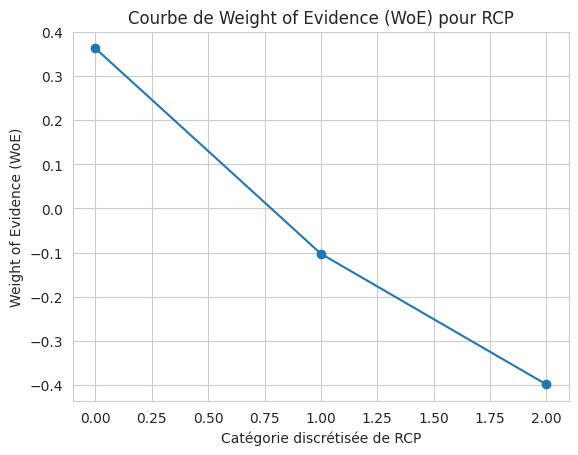

In [ ]:
import matplotlib.pyplot as plt

# Créer une figure et un axe
fig, ax = plt.subplots()

# Tracer la courbe de la Valeur d'Information (IV)
ax.plot(woe_df.index, woe_df['WoE'], marker='o', linestyle='-')

# Ajouter des étiquettes et un titre
ax.set_xlabel('Catégorie discrétisée de RCP')
ax.set_ylabel('Weight of Evidence (WoE)')
ax.set_title('Courbe de Weight of Evidence (WoE) pour RCP')

# Afficher la grille
ax.grid(True)

# Afficher la figure
plt.show()

In [ ]:
# Calculer le nombre d'événements (1) et de non-événements (0) pour chaque catégorie
event_counts = df.groupby('MBE_discretized')['defaut'].sum()
non_event_counts = df.groupby('MBE_discretized')['defaut'].count() - event_counts

# Calculer le WoE pour chaque catégorie
woe_df = pd.DataFrame(index=event_counts.index)
woe_df['Event'] = event_counts
woe_df['Non-Event'] = non_event_counts
woe_df['Total'] = woe_df['Event'] + woe_df['Non-Event']
woe_df['Proportion_Event'] = woe_df['Event'] / woe_df['Event'].sum()
woe_df['Proportion_Non-Event'] = woe_df['Non-Event'] / woe_df['Non-Event'].sum()
woe_df['WoE'] = np.log(woe_df['Proportion_Event'] / woe_df['Proportion_Non-Event'])

# Afficher le tableau
pd.DataFrame(woe_df)

,Event,Non-Event,Total,Proportion_Event,Proportion_Non-Event,WoE
MBE_discretized,,,,,,
0,27.0,480.0,507.0,0.509434,0.326975,0.443415
1,17.0,490.0,507.0,0.320755,0.333787,-0.039828
2,9.0,498.0,507.0,0.169811,0.339237,-0.692011


Pour la catégorie "0" de la variable "MBE_discretized", le WOE est d'environ 0.443. Cela indique une association positive entre cette catégorie et l'événement (ou la variable cible). En d'autres termes, cette catégorie est plus prédictive de l'événement, car elle a une proportion d'événements plus élevée par rapport à la proportion d'événements non-événements.

Pour la catégorie "1" de la variable "MBE_discretized", le WOE est d'environ -0.040. Ce WOE proche de zéro suggère une faible association avec l'événement. Les proportions d'événements et de non-événements sont similaires pour cette catégorie, ce qui signifie qu'elle apporte peu d'information pour prédire l'événement.

Pour la catégorie "2" de la variable "MBE_discretized", le WOE est d'environ -0.692. Ce WOE négatif indique une association inverse avec l'événement. Cette catégorie est plus prédictive du non-événement, car elle a une proportion plus élevée de non-événements par rapport aux événements.

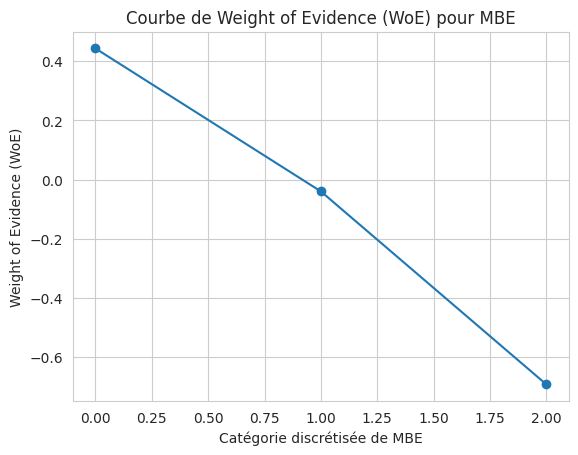

In [ ]:
import matplotlib.pyplot as plt

# Créer une figure et un axe
fig, ax = plt.subplots()

# Tracer la courbe de la Valeur d'Information (IV)
ax.plot(woe_df.index, woe_df['WoE'], marker='o', linestyle='-')

# Ajouter des étiquettes et un titre
ax.set_xlabel('Catégorie discrétisée de MBE')
ax.set_ylabel('Weight of Evidence (WoE)')
ax.set_title('Courbe de Weight of Evidence (WoE) pour MBE')

# Afficher la grille
ax.grid(True)

# Afficher la figure
plt.show()

In [ ]:
def calculate_woe(df, target, selected_variables):
    woe_values = {}
    for feature in selected_variables:
        if feature != target:
            feature_data = df[feature]
            target_data = df[target]
            if feature_data.dtype == 'object':
                feature_data = feature_data.astype('category')
            woe_dict = {}
            for value in feature_data.unique():
                event_count = sum(target_data[feature_data == value])
                non_event_count = len(feature_data[feature_data == value]) - event_count
                if event_count == 0 or non_event_count == 0:
                    continue
                proportion_of_events = event_count / sum(target_data)
                proportion_of_non_events = non_event_count / (len(target_data) - sum(target_data))
                woe = np.log(proportion_of_events / proportion_of_non_events)
                woe_dict[value] = woe
            woe_values[feature] = woe_dict
    return woe_values

# Regrouper les variables par WOE proche
def group_variables_by_woe(woe_values, threshold=0.1):
    grouped_variables = []
    for feature, woe_dict in woe_values.items():
        grouped = False
        for group in grouped_variables:
            if any(value in woe_values[group[0]] and abs(woe_dict[value] - woe_values[group[0]][value]) < threshold for value in woe_dict.keys()):
                group.append(feature)
                grouped = True
                break
        if not grouped:
            grouped_variables.append([feature])
    return grouped_variables
# Calculer les valeurs WOE pour les variables sélectionnées
woe_results = calculate_woe(df, target='defaut', selected_variables=selected_variables)

# Regrouper les variables par WOE proche
grouped_variables = group_variables_by_woe(woe_results)

# Afficher les groupes de variables
for group in grouped_variables:
    print("Groupe de variables:")
    for feature in group:
        print(feature)
    print()


Groupe de variables:
numtiers

Groupe de variables:
Annee

Groupe de variables:
DETTE_FINANCIERE

Groupe de variables:
DELAI_REGLEMENT_CLIENTS

Groupe de variables:
IMPACT_SOCIAUX_ENVIRONNEMENTAL

Groupe de variables:
NIVEAU_COMPETITIVITE

Groupe de variables:
Secteurs

Groupe de variables:
MBE_discretized
RF_discretized
RE_discretized
RTN_discretized

Groupe de variables:
RCL_discretized

Groupe de variables:
secteur_classe



**encoding**

In [ ]:
#encodage
df['IMPACT_SOCIAUX_ENVIRONNEMENTAL'].replace(['Aucun impact', 'Impact social ou environnemental marginal', 'Impact social ou environnemental potentiel mais reversible','Fort impact social ou environnemental irreversible'], (0, 1, 2, 3), inplace=True)
df['NIVEAU_COMPETITIVITE'].replace(['Quelques competiteurs majeurs identifies','Forte presence de produits similaires et competitifs',  'Absence de concurrence (quasi monopole)' ,'Très forte concurrence'], (0, 1, 2, 3), inplace=True)
# Remplacement des classes de secteur par des valeurs numériques
df['secteur_classe'].replace({'Classe 1': 1,
                               'Classe 2': 2,
                               'Classe 3': 3}, inplace=True)

**Correlation**

<Axes: >

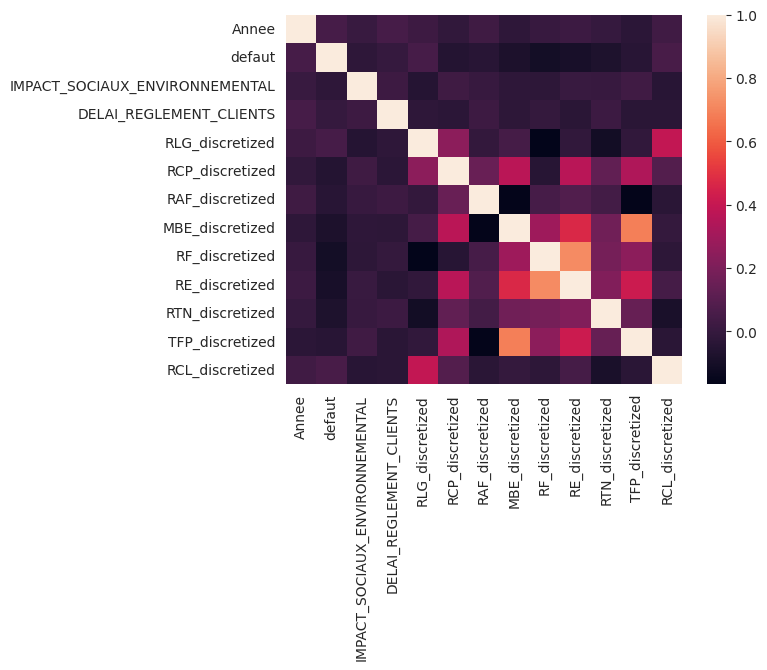

In [ ]:
dff = df[['Annee', 'defaut', 'IMPACT_SOCIAUX_ENVIRONNEMENTAL', 'DELAI_REGLEMENT_CLIENTS', 'RLG_discretized', 'RCP_discretized', 'RAF_discretized', 'MBE_discretized', 'RF_discretized', 'RE_discretized', 'RTN_discretized', 'TFP_discretized', 'RCL_discretized']]
sns.heatmap(dff.corr())

In [ ]:
corr = dff.corr()
pd.DataFrame(corr["defaut"].sort_values())

,defaut
RF_discretized,-0.105379
RE_discretized,-0.092207
MBE_discretized,-0.079035
RTN_discretized,-0.074471
RCP_discretized,-0.057081
RAF_discretized,-0.043908
TFP_discretized,-0.043908
IMPACT_SOCIAUX_ENVIRONNEMENTAL,-0.023496
DELAI_REGLEMENT_CLIENTS,0.000988
Annee,0.047125


Ce tableau montre les corrélations entre la variable cible "defaut" (qui semble être liée à un défaut, peut-être dans un contexte financier ou de prêt) et les autres variables dans votre ensemble de données.

Interprétation :
- Les valeurs négatives indiquent une corrélation négative, ce qui signifie que lorsque la variable augmente, la probabilité de défaut diminue, et vice versa.
- Les valeurs positives indiquent une corrélation positive, ce qui signifie que lorsque la variable augmente, la probabilité de défaut augmente également.

Dans votre cas :
- Les variables telles que "RF_discretized", "RE_discretized", "MBE_discretized" et "RTN_discretized" ont des corrélations négatives avec "defaut", ce qui suggère que des valeurs plus élevées de ces variables sont associées à une probabilité moindre de défaut.
- Les variables "RAF_discretized" et "TFP_discretized" ont également des corrélations négatives, mais plus faibles.
- D'autre part, les variables telles que "RCP_discretized", "IMPACT_SOCIAUX_ENVIRONNEMENTAL" ont des corrélations négatives plus faibles avec "defaut", indiquant une relation moins significative.
- Les variables "DELAI_REGLEMENT_CLIENTS" et "Annee" ont des corrélations plus proches de zéro, ce qui suggère qu'elles ont une influence limitée sur la probabilité de défaut.
- Enfin, les variables "RLG_discretized" et "RCL_discretized" ont des corrélations positives avec "defaut", indiquant une relation positive mais faible.

Ces corrélations peuvent aider à identifier les variables potentiellement importantes pour prédire le défaut et à comprendre comment ces variables sont liées au résultat cible.

**Modelisation**

In [ ]:
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split

# Sélectionner les variables pour le modèle de Cox
selected_columns = ['Annee', 'RD_discretized','MBE_discretized','RCL_discretized', 'RE_discretized', 'secteur_classe',  'defaut']
data_selected = df[selected_columns]

In [ ]:
# Diviser les données en ensembles d'entraînement et de test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(df[selected_columns], df['defaut'], test_size=0.5, random_state=42)

# Vérifier les dimensions des ensembles d'entraînement et de test
print("Taille de l'ensemble d'entraînement:", X_train.shape)
print("Taille de l'ensemble de test:", X_test.shape)

Taille de l'ensemble d'entraînement: (760, 7)
Taille de l'ensemble de test: (761, 7)


In [ ]:
# Vérifier s'il y a des valeurs NaN dans X_train
print(X_train.isnull().sum())
# Imputation des valeurs NaN avec la médiane
X_train['RCL_discretized'].fillna(X_train['RCL_discretized'].median(), inplace=True)
X_train['RE_discretized'].fillna(X_train['RE_discretized'].median(), inplace=True)
# Vérifier s'il y a des valeurs NaN dans X_train
print(X_train.isnull().sum())

Annee              0
RD_discretized     0
MBE_discretized    0
RCL_discretized    0
RE_discretized     0
secteur_classe     0
defaut             0
dtype: int64
Annee              0
RD_discretized     0
MBE_discretized    0
RCL_discretized    0
RE_discretized     0
secteur_classe     0
defaut             0
dtype: int64


In [ ]:
from lifelines import CoxPHFitter

# Créer et entraîner le modèle de régression de Cox sur les données d'entraînement
coxph = CoxPHFitter()
coxph.fit(X_train, duration_col='Annee', event_col='defaut')

# Afficher les résultats
coxph.print_summary()

<lifelines.CoxPHFitter: fitted with 760 total observations, 732 right-censored observations>
             duration col = 'Annee'
                event col = 'defaut'
      baseline estimation = breslow
   number of observations = 760
number of events observed = 28
   partial log-likelihood = -149.04
         time fit was run = 2024-04-16 14:53:36 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
RD_discretized    0.33       1.40       0.25            -0.16             0.83                 0.85                 2.30
MBE_discretized  -0.49       0.62       0.30            -1.08             0.11                 0.34                 1.11
RCL_discretized   0.53       1.70       0.26             0.03             1.03                 1.03                 2.80
RE_discretized   -0.76       0.47       0.30            -1.35            -0.18                 0.26                 0.84
secteur_classe    0.36       1.43       0.23            -0.08             0.80                 0.92                 2.24

                  cmp to     z    p   -log2(p)
covariate                                     
RD_discretized      0.00  1.32 0.19       2.41
MBE_discretized     0.00 -1.60 0.11       3.20
RCL_discretized     0.00  2.06 0.04       4.67
RE_discretized      0.00 -2.54 0.01       6.51
secteur_classe      0.00  1.59 0.11       3.15
---
Concordance = 0.74
Partial AIC = 308.09
log-likelihood ratio test = 19.92 on 5 df
-log2(p) of ll-ratio test = 9.60

In [ ]:
coxph.check_assumptions(X_train,p_value_threshold = 0.05)

Proportional hazard assumption looks okay.


[]

In [ ]:
proportional_hazard_test(fitted_cox_model=coxph, training_df=X_train, time_transform='log')


<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = log
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 760 total observations, 732 right-censored observations>
         test_name = proportional_hazard_test

---
                 test_statistic    p  -log2(p)
MBE_discretized            0.10 0.75      0.41
RCL_discretized            1.68 0.20      2.36
RD_discretized             0.34 0.56      0.84
RE_discretized             0.05 0.82      0.28
secteur_classe             0.20 0.66      0.60

In [ ]:
c_index = coxph.score(X_train, scoring_method="concordance_index")
print(f"Concordance Index: {c_index}")

Concordance Index: 0.7441980644555106


<Axes: >

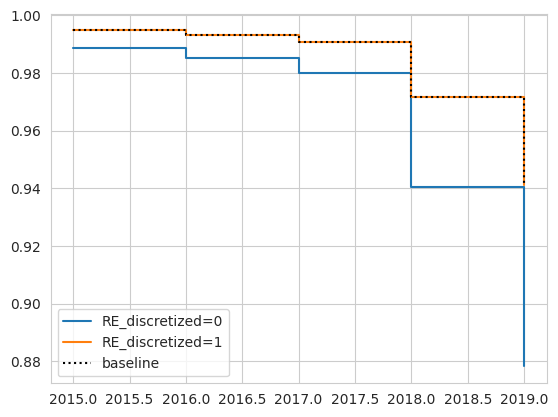

In [ ]:
covariate = 'RE_discretized'

# Définissez les valeurs pour lesquelles vous voulez voir l'effet
values = [0, 1]

# Utilisez la fonction plot_partial_effects_on_outcome pour visualiser l'effet
coxph.plot_partial_effects_on_outcome(covariates=covariate, values=values)

In [ ]:
AR=2*C_index-1
AR

0.48839612891102124